## Neural Networks in Keras

## Import Modules

In [1]:
# Use GPU for Theano, comment to use CPU instead of GPU
# Tensorflow uses GPU by default
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN, device=gpu, floatX=float32"

In [2]:
# If using tensorflow, set image dimensions order
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

Using TensorFlow backend.


In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
% matplotlib inline
np.random.seed(1234)

## Load MNIST Dataset

In [8]:
from keras.datasets import mnist
(train_features, train_labels),(test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols = train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows * img_cols

print("Number of training samples: %d"%train_features.shape[0])
print("Number of test samples: %d"%test_features.shape[0])
print("Image rows: %d"% train_features.shape[1])
print("Image cols: %d"% train_features.shape[2])
print("Number of classes: %d"%num_classes)

Number of training samples: 60000
Number of test samples: 10000
Image rows: 28
Image cols: 28
Number of classes: 10


## Show Examples from Each Class

<function matplotlib.pyplot.show>

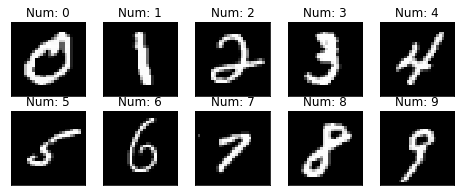

In [10]:
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    features_idx = train_features[train_labels[:]==i, :]
    ax.set_title("Num: " +str(i))
    plt.imshow(features_idx[1], cmap="gray")
plt.show

## Pre-processing

In [11]:
# Reshape image to column vectors
train_features = train_features.reshape(train_features.shape[0], img_rows * img_cols)
test_features = test_features.reshape(test_features.shape[0], img_rows * img_cols)

# Convert class labels into categorical bynary labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [14]:
def plotModelHistory(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [18]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

## Creating Neural Network model with a Single Hidden Layer

Optimizer: Stochastic Gradient Descent
Loss: MSE

In [12]:
model = Sequential()
model.add(Dense(100, input_dim = num_input_nodes)) # Add input layer and hidden layer
model.add(Activation("sigmoid")) # Activation layer for non-linearity
# NOTE: to add ReLu instead of sigmoid: model.add(Activation('relu'))
# combine above 2 layers: model.add(Dense(100, input_dim= img_rows*img_cols),Activation('sigmoid')) 
model.add(Dense(num_classes)) # Add output layer
model.add(Activation("softmax")) # Add sofmax activation layer

# Compile the model
sgd = SGD(lr =0.01) # Using Stochastic Gradient Descent
model.compile(optimizer = sgd, loss ='mse', metrics =['accuracy'])

# Mode summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## Train the model

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
6s - loss: 0.0189 - acc: 0.8983 - val_loss: 0.0189 - val_acc: 0.8912
Epoch 2/10
6s - loss: 0.0186 - acc: 0.8998 - val_loss: 0.0186 - val_acc: 0.8914
Epoch 3/10
6s - loss: 0.0183 - acc: 0.9013 - val_loss: 0.0184 - val_acc: 0.8926
Epoch 4/10
6s - loss: 0.0180 - acc: 0.9026 - val_loss: 0.0182 - val_acc: 0.8935
Epoch 5/10
6s - loss: 0.0178 - acc: 0.9034 - val_loss: 0.0180 - val_acc: 0.8932
Epoch 6/10
6s - loss: 0.0175 - acc: 0.9044 - val_loss: 0.0178 - val_acc: 0.8942
Epoch 7/10
6s - loss: 0.0173 - acc: 0.9055 - val_loss: 0.0176 - val_acc: 0.8952
Epoch 8/10
6s - loss: 0.0171 - acc: 0.9062 - val_loss: 0.0175 - val_acc: 0.8949
Epoch 9/10
6s - loss: 0.0169 - acc: 0.9071 - val_loss: 0.0173 - val_acc: 0.8960
Epoch 10/10
6s - loss: 0.0167 - acc: 0.9081 - val_loss: 0.0172 - val_acc: 0.8972


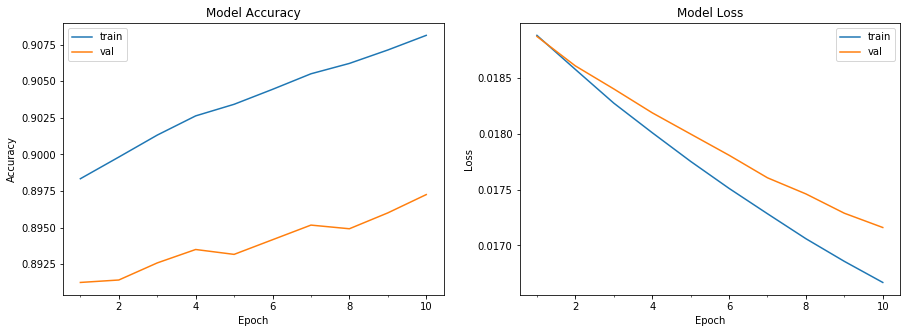

Model took 62.27 seconds to train
Accuracy on test data is: 89.85


In [20]:
start_time = time.time()
model_info = model.fit(train_features, train_labels, batch_size= 64,
                      epochs = 10, validation_split = 0.2, verbose =2)
end_time = time.time()
# Plot model history
plotModelHistory(model_info)
print("Model took %0.2f seconds to train"%(end_time - start_time))
# Compute accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


## Observation:

Both training and validation accuracy increase as the number of epochs increase. 
More information is learned in each epoch.

## Varying the Learning Rate - Decrease

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
7s - loss: 0.0956 - acc: 0.1438 - val_loss: 0.0937 - val_acc: 0.1598
Epoch 2/10
6s - loss: 0.0924 - acc: 0.1677 - val_loss: 0.0914 - val_acc: 0.1856
Epoch 3/10
6s - loss: 0.0903 - acc: 0.1983 - val_loss: 0.0896 - val_acc: 0.2138
Epoch 4/10
7s - loss: 0.0886 - acc: 0.2253 - val_loss: 0.0880 - val_acc: 0.2365
Epoch 5/10
7s - loss: 0.0871 - acc: 0.2462 - val_loss: 0.0865 - val_acc: 0.2528
Epoch 6/10
8s - loss: 0.0857 - acc: 0.2642 - val_loss: 0.0851 - val_acc: 0.2685
Epoch 7/10
7s - loss: 0.0844 - acc: 0.2788 - val_loss: 0.0838 - val_acc: 0.2855
Epoch 8/10
8s - loss: 0.0832 - acc: 0.2936 - val_loss: 0.0826 - val_acc: 0.2995
Epoch 9/10
7s - loss: 0.0820 - acc: 0.3075 - val_loss: 0.0815 - val_acc: 0.3128
Epoch 10/10
7s - loss: 0.0809 - acc: 0.3204 - val_loss: 0.0804 - val_acc: 0.3256


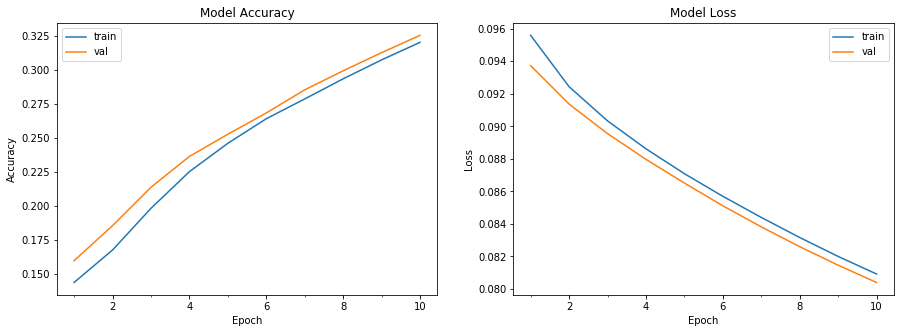

Model took 74.74 seconds to train
Accuracy on test data is: 33.72


In [21]:
model = Sequential()
model.add(Dense(100, input_dim = num_input_nodes)) # Add input layer and hidden layer
model.add(Activation("sigmoid")) # Activation layer for non-linearity
# NOTE: to add ReLu instead of sigmoid: model.add(Activation('relu'))
# combine above 2 layers: model.add(Dense(100, input_dim= img_rows*img_cols),Activation('sigmoid')) 
model.add(Dense(num_classes)) # Add output layer
model.add(Activation("softmax")) # Add sofmax activation layer

# Compile the model
sgd = SGD(lr =0.001)
model.compile(optimizer = sgd, loss ='mse', metrics =['accuracy'])

start_time = time.time()
model_info = model.fit(train_features, train_labels, batch_size= 64,
                      epochs = 10, validation_split = 0.2, verbose =2)
end_time = time.time()
# Plot model history
plotModelHistory(model_info)
print("Model took %0.2f seconds to train"%(end_time - start_time))
# Compute accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Varying the Learning Rate - Increase

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
6s - loss: 0.0557 - acc: 0.6202 - val_loss: 0.0334 - val_acc: 0.8279
Epoch 2/10
6s - loss: 0.0280 - acc: 0.8496 - val_loss: 0.0222 - val_acc: 0.8812
Epoch 3/10
6s - loss: 0.0213 - acc: 0.8792 - val_loss: 0.0185 - val_acc: 0.8951
Epoch 4/10
6s - loss: 0.0185 - acc: 0.8933 - val_loss: 0.0165 - val_acc: 0.9048
Epoch 5/10
6s - loss: 0.0167 - acc: 0.9003 - val_loss: 0.0155 - val_acc: 0.9087
Epoch 6/10
6s - loss: 0.0154 - acc: 0.9086 - val_loss: 0.0142 - val_acc: 0.9141
Epoch 7/10
6s - loss: 0.0146 - acc: 0.9128 - val_loss: 0.0136 - val_acc: 0.9185
Epoch 8/10
6s - loss: 0.0136 - acc: 0.9183 - val_loss: 0.0130 - val_acc: 0.9216
Epoch 9/10
6s - loss: 0.0130 - acc: 0.9221 - val_loss: 0.0127 - val_acc: 0.9202
Epoch 10/10
6s - loss: 0.0126 - acc: 0.9231 - val_loss: 0.0122 - val_acc: 0.9252


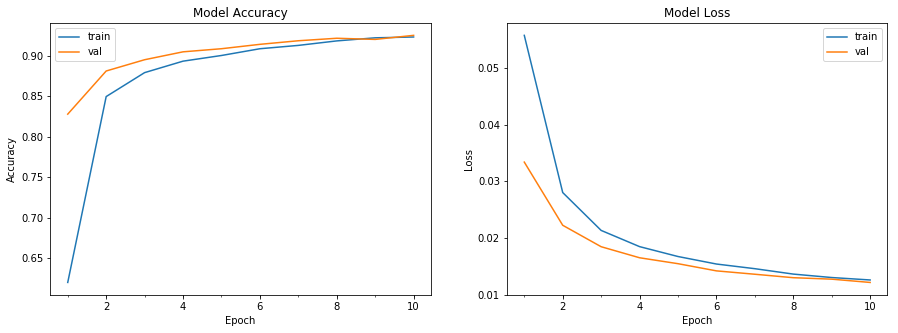

Model took 64.96 seconds to train
Accuracy on test data is: 92.46


In [22]:
model = Sequential()
model.add(Dense(100, input_dim = num_input_nodes)) # Add input layer and hidden layer
model.add(Activation("sigmoid")) # Activation layer for non-linearity
# NOTE: to add ReLu instead of sigmoid: model.add(Activation('relu'))
# combine above 2 layers: model.add(Dense(100, input_dim= img_rows*img_cols),Activation('sigmoid')) 
model.add(Dense(num_classes)) # Add output layer
model.add(Activation("softmax")) # Add sofmax activation layer

# Compile the model
sgd = SGD(lr =0.1)
model.compile(optimizer = sgd, loss ='mse', metrics =['accuracy'])

start_time = time.time()
model_info = model.fit(train_features, train_labels, batch_size= 64,
                      epochs = 10, validation_split = 0.2, verbose =2)
end_time = time.time()
# Plot model history
plotModelHistory(model_info)
print("Model took %0.2f seconds to train"%(end_time - start_time))
# Compute accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Observation:

If the learning rate is decreased, less information is learned in each epoch and more epochs are required to learn a good model. 
If the learning rate is increased, more information is learned in each epoch and less epochs are required to learn a good model.
When using SGD, learning rate needs to be decided emperically for a given dataset. 


## Use Adam optimizer instead of SGD


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
8s - loss: 0.0289 - acc: 0.8224 - val_loss: 0.0174 - val_acc: 0.8962
Epoch 2/10
9s - loss: 0.0176 - acc: 0.8914 - val_loss: 0.0147 - val_acc: 0.9061
Epoch 3/10
9s - loss: 0.0162 - acc: 0.8980 - val_loss: 0.0146 - val_acc: 0.9084
Epoch 4/10
10s - loss: 0.0153 - acc: 0.9018 - val_loss: 0.0134 - val_acc: 0.9170
Epoch 5/10
9s - loss: 0.0143 - acc: 0.9089 - val_loss: 0.0135 - val_acc: 0.9117
Epoch 6/10
10s - loss: 0.0140 - acc: 0.9101 - val_loss: 0.0129 - val_acc: 0.9153
Epoch 7/10
10s - loss: 0.0136 - acc: 0.9125 - val_loss: 0.0132 - val_acc: 0.9159
Epoch 8/10
10s - loss: 0.0133 - acc: 0.9140 - val_loss: 0.0126 - val_acc: 0.9207
Epoch 9/10
9s - loss: 0.0129 - acc: 0.9166 - val_loss: 0.0127 - val_acc: 0.9179
Epoch 10/10
11s - loss: 0.0127 - acc: 0.9185 - val_loss: 0.0125 - val_acc: 0.9192


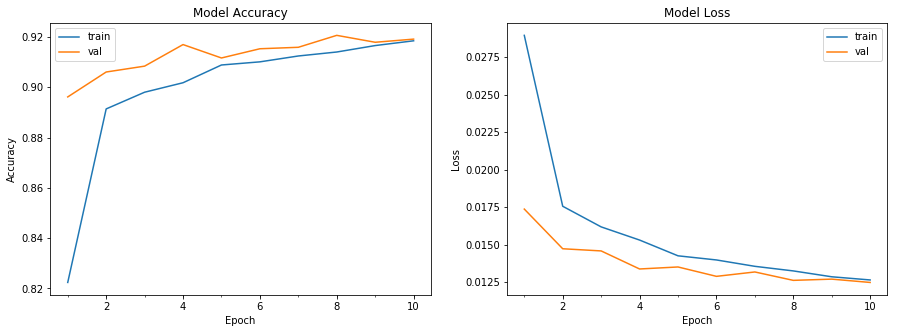

Model took 101.65 seconds to train
Accuracy on test data is: 91.87


In [23]:
model = Sequential()
model.add(Dense(100, input_dim = num_input_nodes)) # Add input layer and hidden layer
model.add(Activation("sigmoid")) # Activation layer for non-linearity
# NOTE: to add ReLu instead of sigmoid: model.add(Activation('relu'))
# combine above 2 layers: model.add(Dense(100, input_dim= img_rows*img_cols),Activation('sigmoid')) 
model.add(Dense(num_classes)) # Add output layer
model.add(Activation("softmax")) # Add sofmax activation layer

# Compile the model

model.compile(optimizer = "adam", loss ='mse', metrics =['accuracy'])

start_time = time.time()
model_info = model.fit(train_features, train_labels, batch_size= 64,
                      epochs = 10, validation_split = 0.2, verbose =2)
end_time = time.time()
# Plot model history
plotModelHistory(model_info)
print("Model took %0.2f seconds to train"%(end_time - start_time))
# Compute accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Observation:

Using Adam optimizer, we don’t need to specify a learning rate. However, the training time increases.

Reference [this](http://sebastianruder.com/optimizing-gradient-descent/) tutorial for an interesting comparison of optimizers.

## Vary the Batch Size

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
7s - loss: 0.0323 - acc: 0.7985 - val_loss: 0.0175 - val_acc: 0.8987
Epoch 2/10
7s - loss: 0.0168 - acc: 0.8992 - val_loss: 0.0144 - val_acc: 0.9097
Epoch 3/10
6s - loss: 0.0146 - acc: 0.9096 - val_loss: 0.0138 - val_acc: 0.9126
Epoch 4/10
6s - loss: 0.0136 - acc: 0.9146 - val_loss: 0.0118 - val_acc: 0.9235
Epoch 5/10
7s - loss: 0.0127 - acc: 0.9198 - val_loss: 0.0118 - val_acc: 0.9247
Epoch 6/10
6s - loss: 0.0125 - acc: 0.9221 - val_loss: 0.0113 - val_acc: 0.9258
Epoch 7/10
6s - loss: 0.0119 - acc: 0.9248 - val_loss: 0.0116 - val_acc: 0.9241
Epoch 8/10
6s - loss: 0.0120 - acc: 0.9225 - val_loss: 0.0114 - val_acc: 0.9287
Epoch 9/10
6s - loss: 0.0113 - acc: 0.9274 - val_loss: 0.0110 - val_acc: 0.9295
Epoch 10/10
7s - loss: 0.0109 - acc: 0.9304 - val_loss: 0.0104 - val_acc: 0.9343


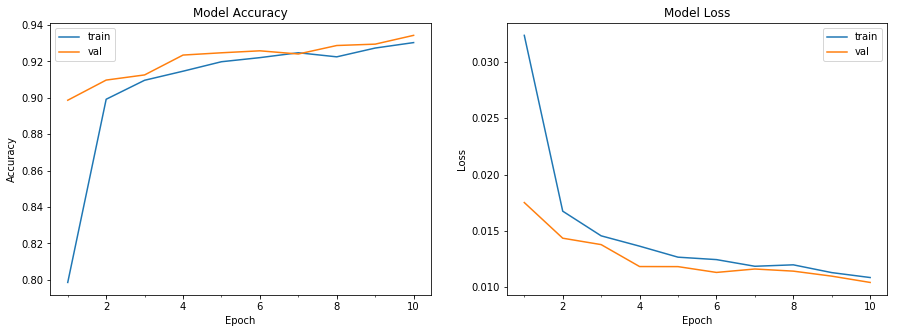

Model took 68.23 seconds to train
Accuracy on test data is: 93.06


In [24]:
#######################
# Increasing batch size
model = Sequential()
model.add(Dense(100, input_dim = num_input_nodes)) # Add input layer and hidden layer
model.add(Activation("sigmoid")) # Activation layer for non-linearity
# NOTE: to add ReLu instead of sigmoid: model.add(Activation('relu'))
# combine above 2 layers: model.add(Dense(100, input_dim= img_rows*img_cols),Activation('sigmoid')) 
model.add(Dense(num_classes)) # Add output layer
model.add(Activation("softmax")) # Add sofmax activation layer

# Compile the model

model.compile(optimizer = "adam", loss ='mse', metrics =['accuracy'])

start_time = time.time()
model_info = model.fit(train_features, train_labels, batch_size= 64*2,
                      epochs = 10, validation_split = 0.2, verbose =2)
end_time = time.time()
# Plot model history
plotModelHistory(model_info)
print("Model took %0.2f seconds to train"%(end_time - start_time))
# Compute accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
15s - loss: 0.0273 - acc: 0.8347 - val_loss: 0.0185 - val_acc: 0.8873
Epoch 2/10
15s - loss: 0.0180 - acc: 0.8892 - val_loss: 0.0152 - val_acc: 0.9047
Epoch 3/10
14s - loss: 0.0161 - acc: 0.8969 - val_loss: 0.0157 - val_acc: 0.9022
Epoch 4/10
14s - loss: 0.0156 - acc: 0.8996 - val_loss: 0.0142 - val_acc: 0.9088
Epoch 5/10
14s - loss: 0.0153 - acc: 0.9012 - val_loss: 0.0146 - val_acc: 0.9051
Epoch 6/10
14s - loss: 0.0150 - acc: 0.9037 - val_loss: 0.0141 - val_acc: 0.9103
Epoch 7/10
14s - loss: 0.0150 - acc: 0.9019 - val_loss: 0.0136 - val_acc: 0.9116
Epoch 8/10
14s - loss: 0.0145 - acc: 0.9055 - val_loss: 0.0138 - val_acc: 0.9109
Epoch 9/10
14s - loss: 0.0137 - acc: 0.9115 - val_loss: 0.0129 - val_acc: 0.9166
Epoch 10/10
14s - loss: 0.0139 - acc: 0.9086 - val_loss: 0.0131 - val_acc: 0.9127


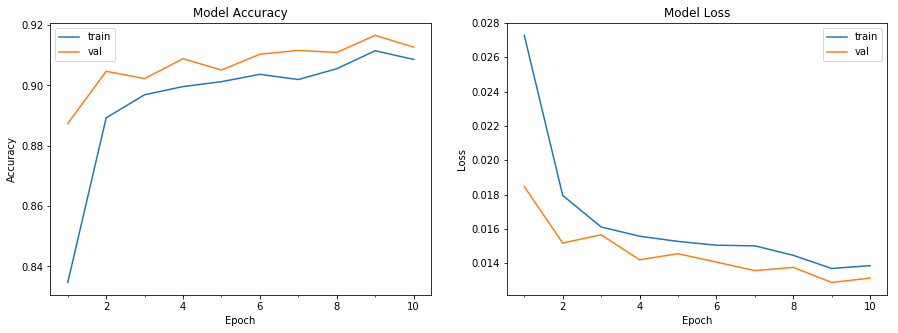

Model took 146.19 seconds to train
Accuracy on test data is: 91.40


In [25]:
#######################
# Decreasing batch size
model = Sequential()
model.add(Dense(100, input_dim = num_input_nodes)) # Add input layer and hidden layer
model.add(Activation("sigmoid")) # Activation layer for non-linearity
# NOTE: to add ReLu instead of sigmoid: model.add(Activation('relu'))
# combine above 2 layers: model.add(Dense(100, input_dim= img_rows*img_cols),Activation('sigmoid')) 
model.add(Dense(num_classes)) # Add output layer
model.add(Activation("softmax")) # Add sofmax activation layer

# Compile the model

model.compile(optimizer = "adam", loss ='mse', metrics =['accuracy'])

start_time = time.time()
model_info = model.fit(train_features, train_labels, batch_size= 32,
                      epochs = 10, validation_split = 0.2, verbose =2)
end_time = time.time()
# Plot model history
plotModelHistory(model_info)
print("Model took %0.2f seconds to train"%(end_time - start_time))
# Compute accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Observation:

Increasing the batch size decreases the training time but reduces the rate of learning.

## Change the Cost Function to Categorical Crossentropy

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
6s - loss: 0.7178 - acc: 0.8117 - val_loss: 0.3906 - val_acc: 0.8999
Epoch 2/10
5s - loss: 0.3656 - acc: 0.8991 - val_loss: 0.3265 - val_acc: 0.9112
Epoch 3/10
8s - loss: 0.3228 - acc: 0.9089 - val_loss: 0.2933 - val_acc: 0.9170
Epoch 4/10
7s - loss: 0.2989 - acc: 0.9138 - val_loss: 0.2781 - val_acc: 0.9195
Epoch 5/10
7s - loss: 0.2753 - acc: 0.9192 - val_loss: 0.2619 - val_acc: 0.9237
Epoch 6/10
5s - loss: 0.2590 - acc: 0.9261 - val_loss: 0.2484 - val_acc: 0.9293
Epoch 7/10
5s - loss: 0.2517 - acc: 0.9264 - val_loss: 0.2393 - val_acc: 0.9323
Epoch 8/10
5s - loss: 0.2468 - acc: 0.9277 - val_loss: 0.2476 - val_acc: 0.9279
Epoch 9/10
5s - loss: 0.2472 - acc: 0.9262 - val_loss: 0.2421 - val_acc: 0.9274
Epoch 10/10
5s - loss: 0.2383 - acc: 0.9288 - val_loss: 0.2239 - val_acc: 0.9341


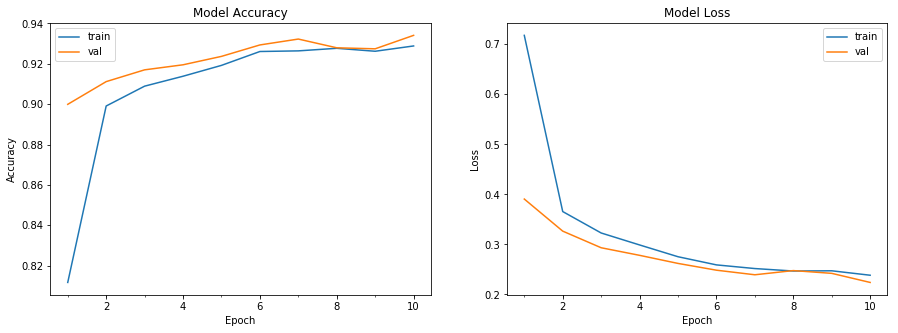

Model took 64.71 seconds to train
Accuracy on test data is: 93.41


In [26]:
model = Sequential()
model.add(Dense(100, input_dim = num_input_nodes)) # Add input layer and hidden layer
model.add(Activation("sigmoid")) # Activation layer for non-linearity
# NOTE: to add ReLu instead of sigmoid: model.add(Activation('relu'))
# combine above 2 layers: model.add(Dense(100, input_dim= img_rows*img_cols),Activation('sigmoid')) 
model.add(Dense(num_classes)) # Add output layer
model.add(Activation("softmax")) # Add sofmax activation layer

# Compile the model
model.compile(optimizer = "adam", loss ='categorical_crossentropy', metrics =['accuracy'])

start_time = time.time()
model_info = model.fit(train_features, train_labels, batch_size= 128,
                      epochs = 10, validation_split = 0.2, verbose =2)
end_time = time.time()
# Plot model history
plotModelHistory(model_info)
print("Model took %0.2f seconds to train"%(end_time - start_time))
# Compute accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

## Observation:

Changing the cost function to categorical crossentropy reduced the training time. 

The decrease in training time is significant when using SGD for this experiment. 

## Increase the Number of Epochs

In [27]:
model = Sequential()
model.add(Dense(100, input_dim = num_input_nodes)) # Add input layer and hidden layer
model.add(Activation("sigmoid")) # Activation layer for non-linearity
# NOTE: to add ReLu instead of sigmoid: model.add(Activation('relu'))
# combine above 2 layers: model.add(Dense(100, input_dim= img_rows*img_cols),Activation('sigmoid')) 
model.add(Dense(num_classes)) # Add output layer
model.add(Activation("softmax")) # Add sofmax activation layer

# Compile the model
model.compile(optimizer = "adam", loss ='categorical_crossentropy', metrics =['accuracy'])

start_time = time.time()
model_info = model.fit(train_features, train_labels, batch_size= 128,
                      epochs = 10*10, validation_split = 0.2, verbose =0)
end_time = time.time()
# Plot model history
plotModelHistory(model_info)
print("Model took %0.2f seconds to train"%(end_time - start_time))
# Compute accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
6s - loss: 0.6865 - acc: 0.8191 - val_loss: 0.3865 - val_acc: 0.8957
Epoch 2/100
6s - loss: 0.3636 - acc: 0.8992 - val_loss: 0.3287 - val_acc: 0.9107
Epoch 3/100
6s - loss: 0.3166 - acc: 0.9118 - val_loss: 0.2865 - val_acc: 0.9204
Epoch 4/100
6s - loss: 0.2895 - acc: 0.9165 - val_loss: 0.2683 - val_acc: 0.9252
Epoch 5/100
6s - loss: 0.2693 - acc: 0.9217 - val_loss: 0.2510 - val_acc: 0.9275
Epoch 6/100
6s - loss: 0.2636 - acc: 0.9237 - val_loss: 0.2528 - val_acc: 0.9267
Epoch 7/100
6s - loss: 0.2445 - acc: 0.9274 - val_loss: 0.2490 - val_acc: 0.9276
Epoch 8/100
6s - loss: 0.2459 - acc: 0.9270 - val_loss: 0.2386 - val_acc: 0.9312
Epoch 9/100
6s - loss: 0.2371 - acc: 0.9297 - val_loss: 0.2318 - val_acc: 0.9363
Epoch 10/100
6s - loss: 0.2325 - acc: 0.9299 - val_loss: 0.2308 - val_acc: 0.9321
Epoch 11/100
5s - loss: 0.2329 - acc: 0.9295 - val_loss: 0.2257 - val_acc: 0.9329
Epoch 12/100
5s - loss: 0.2374 - acc: 0.9295 - val_loss: 

KeyboardInterrupt: 

## Observation:

As the number of epochs increase, more information is learned. 

The training as well as validation accuracy increases and then stabilizes.

## Lets set an DEEP NN

In [28]:
model = Sequential()
model.add(Dense(512, input_dim=num_input_nodes))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
sgd = SGD(lr =0.1)
model.compile(optimizer = sgd, loss ='mse', metrics =['accuracy'])

start_time = time.time()
model_info = model.fit(train_features, train_labels, batch_size= 128,
                      epochs = 100, validation_split = 0.2, verbose =0)
end_time = time.time()
# Plot model history
plotModelHistory(model_info)
print("Model took %0.2f seconds to train"%(end_time - start_time))
# Compute accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


KeyboardInterrupt: 

## Observation:

By adding more hidden layers, training time as well as information learned in each epoch increases. 

It helps to improve the performance for complex tasks but may not help significantly for relatively simple datasets such as MNIST.

## Save model every 10th epoch

In [30]:
from keras.callbacks import ModelCheckpoint
import os

model = Sequential()
model.add(Dense(512, input_dim=num_input_nodes))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Compile the model
sgd = SGD(lr =0.1)
model.compile(optimizer = sgd, loss ='mse', metrics =['accuracy'])

# Checkpoint for save
outputFolder = './output-mnist'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, \
                             save_best_only=False, save_weights_only=True, \
                             mode='auto', period=10)
callbacks_list = [checkpoint]


model_info = model.fit(train_features, train_labels, batch_size= 128,
                      epochs = 100, validation_split = 0.2, verbose =2)
# Compute accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Train on 48000 samples, validate on 12000 samples
Epoch 1/100


KeyboardInterrupt: 

In [ ]:
## Resume training by loading a saved model
model = Sequential()
model.add(Dense(512, input_dim=num_input_nodes))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

import os, glob
epoch_num = 79 # Set the epoch were to start

outputFolder = './output-mnist'
file_ini = outputFolder+'/weights-'+ str(epoch_num)+'*'
filename =  glob.glob(file_ini)
if os.path.isfile(filename[0]):
    model.load_weights(filename[0])
else:
    print "%s does not exist"%filename[0]
# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# checkpoint
outputFolder = './output-mnist'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)
filepath=outputFolder+"/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, \
                             save_best_only=False, save_weights_only=True,\
                             mode='auto', period=10)
callbacks_list = [checkpoint]

model_info = model.fit(train_features, train_labels, batch_size= 128,
                      epochs = 100, validation_split = 0.2, verbose =0)
# Compute accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))



## Early Stopping

In [ ]:
model = Sequential()
model.add(Dense(512, input_dim=num_input_nodes))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# Define early stopping callback
earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]

# Train the model
start_time = time.time()
model_info = model.fit(train_features, train_labels, batch_size= 128,
                      epochs = 100, validation_split = 0.2, verbose =0)
end_time = time.time()
# Plot model history
plotModelHistory(model_info)
print("Model took %0.2f seconds to train"%(end_time - start_time))
# Compute accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))